Kunskapskontroll 2

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.datasets import fetch_openml

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import pickle
import joblib



Preparing and fetching dataset

In [ ]:
mnist = fetch_openml('mnist_784', version = 1, cache = True, as_frame = False)

print(mnist.DESCR)

In [4]:
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

EDA

In [5]:
print(f"Dataset Shape: {X.shape}, Labels Shape: {y.shape}")

Dataset Shape: (70000, 784), Labels Shape: (70000,)


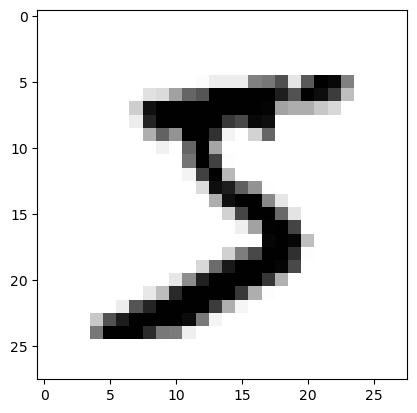

In [5]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=plt.get_cmap("binary"))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train_sample, y_train_sample = resample(X_train, y_train, n_samples=10000, random_state=42)

In [ ]:
param_grid_dt = {
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],  
    'penalty': ['l2'],  
    'solver': ['lbfgs', 'saga'],
    'max_iter': [500, 1000, 2000]
}


In [10]:
dt_clf = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(dt_clf, param_grid_dt, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_dt.fit(X_train_sample, y_train_sample)
print("Best Decision Tree Parameters:", grid_search_dt.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Decision Tree Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [11]:
rf_clf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_rf.fit(X_train_sample, y_train_sample)
print("Best Random Forest Parameters:", grid_search_rf.best_params_)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Random Forest Parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [14]:
scaler = StandardScaler()
X_train_sample_scaled = scaler.fit_transform(X_train_sample)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lr_clf = LogisticRegression(random_state=42)
grid_search_lr = GridSearchCV(lr_clf, param_grid_lr, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_lr.fit(X_train_sample_scaled, y_train_sample)
print("Best Logistic Regression Parameters:", grid_search_lr.best_params_)

In [ ]:
best_dt_clf = DecisionTreeClassifier(**grid_search_dt.best_params_, random_state=42)
best_rf_clf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)
best_lr_clf = LogisticRegression(**grid_search_lr.best_params_, random_state=42)

best_dt_clf.fit(X_train, y_train)
best_rf_clf.fit(X_train, y_train)
best_lr_clf.fit(scaler.transform(X_train), y_train)

c:\Users\46733\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.1, max_iter=500, random_state=42, solver='saga')

In [ ]:
# save
joblib.dump(best_dt_clf, "DecisionTree_small_CV.pkl") 

joblib.dump(best_rf_clf, "RandomForest_small_CV.pkl") 

joblib.dump(best_lr_clf, "LogisticRegression_small_CV.pkl") 

['LogisticRegression_small_CV.pkl']

In [ ]:
# load
dt_model_joblib = joblib.load("DecisionTree_small_CV.pkl")
rf_model_joblib = joblib.load("RandomForest_small_CV.pkl")
lr_model_joblib = joblib.load("LogisticRegression_small_CV.pkl")

In [ ]:
y_pred_dt = best_dt_clf.predict(X_test)
y_pred_rf = best_rf_clf.predict(X_test)
y_pred_lr = best_lr_clf.predict(X_test_scaled) 

In [19]:
print(f"Decision Tree Test Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Random Forest Test Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Logistic Regression Test Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")

Decision Tree Test Accuracy: 0.8329
Random Forest Test Accuracy: 0.9713
Logistic Regression Test Accuracy: 0.7564
